### Stock Market Prediction And Forecasting Using Stacked LSTM

####  Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

####  Import dataset

In [ ]:
data=pd.read_csv('TSLA.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1541,2021-08-23,685.440002,712.130005,680.750000,706.299988,706.299988,20264900
1542,2021-08-24,710.679993,715.219971,702.640015,708.489990,708.489990,13083100
1543,2021-08-25,707.030029,716.969971,704.000000,711.200012,711.200012,12645600
1544,2021-08-26,708.309998,715.400024,697.619995,701.159973,701.159973,13214300
1545,2021-08-27,705.000000,715.000000,702.099976,711.919983,711.919983,13762100


#### the data is sort with respect of date

#### I pick the coloum "High" for Forecasting 

In [ ]:
df=data.reset_index()['High']

In [ ]:
len(df)

1546

In [ ]:
df

0        52.599998
1        52.509998
2        53.198002
3        53.498001
4        53.439999
           ...    
1541    712.130005
1542    715.219971
1543    716.969971
1544    715.400024
1545    715.000000
Name: High, Length: 1546, dtype: float64

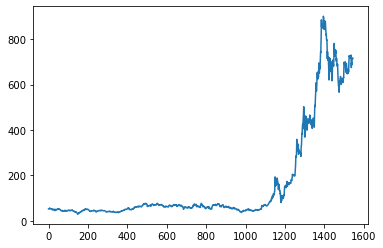

In [ ]:
# polt it
plt.plot(df)

####  Normalize the data

In [ ]:
#NORMALIZE
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
print(df1)

[[0.02485145]
 [0.02474793]
 [0.02553928]
 ...
 [0.78901681]
 [0.78721104]
 [0.78675093]]


Text(0.5, 1.0, 'After normalize')

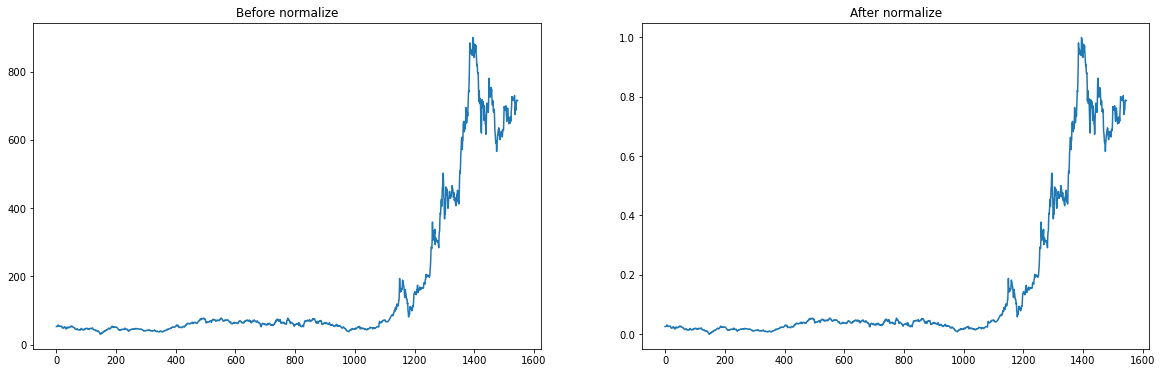

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(df)
plt.title("Before normalize")
plt.subplot(1, 2, 2)
plt.plot(df1)
plt.title("After normalize")


####  Split the dataset in to train and test

##### 65% splitting dataset into train and remaing into test split

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1004, 542)

In [ ]:
train_data

array([[0.02485145],
       [0.02474793],
       [0.02553928],
       ...,
       [0.01706453],
       [0.01992165],
       [0.01851379]])

### Convert the dataset into dataX, dataY, first 150 samples as dataX[1] , 
### then 151th sample as dataY[1] 
#### 2nd to 151th as 150 samples as dataX[2], 
#### Then 152th sample as dataY[2] and so on......

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(853, 150)
(853,)


In [ ]:
print(X_test.shape)
print(ytest.shape)

(391, 150)
(391,)


#### reshape input to be [samples, time steps, features] which is required for LSTM

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(853, 150, 1)
(391, 150, 1)


## Time to create a LSTM model

In [ ]:
### Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(LSTM(150,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 150, 150)          91200     
_________________________________________________________________
lstm_20 (LSTM)               (None, 150, 100)          100400    
_________________________________________________________________
lstm_21 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 221,851
Trainable params: 221,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=128,verbose=2)

Epoch 1/150
7/7 - 21s - loss: 3.3818e-04 - val_loss: 0.1867
Epoch 2/150
7/7 - 17s - loss: 1.1827e-04 - val_loss: 0.1509
Epoch 3/150
7/7 - 16s - loss: 9.0457e-05 - val_loss: 0.0821
Epoch 4/150
7/7 - 16s - loss: 5.1065e-05 - val_loss: 0.0162
Epoch 5/150
7/7 - 16s - loss: 3.4415e-05 - val_loss: 0.0095
Epoch 6/150
7/7 - 16s - loss: 2.8876e-05 - val_loss: 0.0233
Epoch 7/150
7/7 - 16s - loss: 2.5604e-05 - val_loss: 0.0182
Epoch 8/150
7/7 - 16s - loss: 2.4158e-05 - val_loss: 0.0103
Epoch 9/150
7/7 - 16s - loss: 2.4385e-05 - val_loss: 0.0134
Epoch 10/150
7/7 - 16s - loss: 2.4866e-05 - val_loss: 0.0135
Epoch 11/150
7/7 - 16s - loss: 2.4305e-05 - val_loss: 0.0119
Epoch 12/150
7/7 - 16s - loss: 2.5692e-05 - val_loss: 0.0128
Epoch 13/150
7/7 - 16s - loss: 2.2760e-05 - val_loss: 0.0112
Epoch 14/150
7/7 - 16s - loss: 2.3265e-05 - val_loss: 0.0102
Epoch 15/150
7/7 - 16s - loss: 2.2424e-05 - val_loss: 0.0108
Epoch 16/150
7/7 - 16s - loss: 2.0910e-05 - val_loss: 0.0093
Epoch 17/150
7/7 - 16s - loss: 2.

Epoch 136/150
7/7 - 5s - loss: 6.7222e-06 - val_loss: 0.0027
Epoch 137/150
7/7 - 5s - loss: 6.7604e-06 - val_loss: 0.0022
Epoch 138/150
7/7 - 5s - loss: 7.1314e-06 - val_loss: 0.0028
Epoch 139/150
7/7 - 5s - loss: 7.0324e-06 - val_loss: 0.0020
Epoch 140/150
7/7 - 5s - loss: 7.3642e-06 - val_loss: 0.0030
Epoch 141/150
7/7 - 5s - loss: 7.1858e-06 - val_loss: 0.0022
Epoch 142/150
7/7 - 5s - loss: 6.6123e-06 - val_loss: 0.0026
Epoch 143/150
7/7 - 5s - loss: 7.1502e-06 - val_loss: 0.0024
Epoch 144/150
7/7 - 5s - loss: 6.6270e-06 - val_loss: 0.0028
Epoch 145/150
7/7 - 5s - loss: 6.4378e-06 - val_loss: 0.0021
Epoch 146/150
7/7 - 5s - loss: 6.4242e-06 - val_loss: 0.0027
Epoch 147/150
7/7 - 5s - loss: 6.3218e-06 - val_loss: 0.0020
Epoch 148/150
7/7 - 5s - loss: 6.4263e-06 - val_loss: 0.0023
Epoch 149/150
7/7 - 5s - loss: 7.3776e-06 - val_loss: 0.0023
Epoch 150/150
7/7 - 5s - loss: 7.3724e-06 - val_loss: 0.0027


Text(0.5, 1.0, 'Loss evolution')

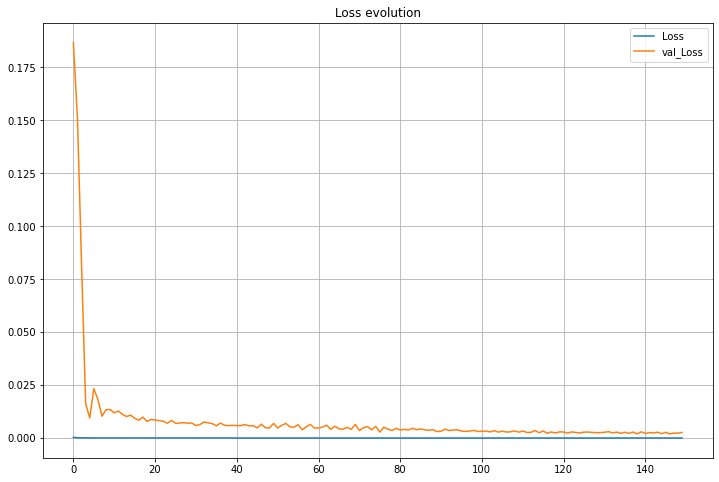

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

59.342749010491886

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

500.54210421094535

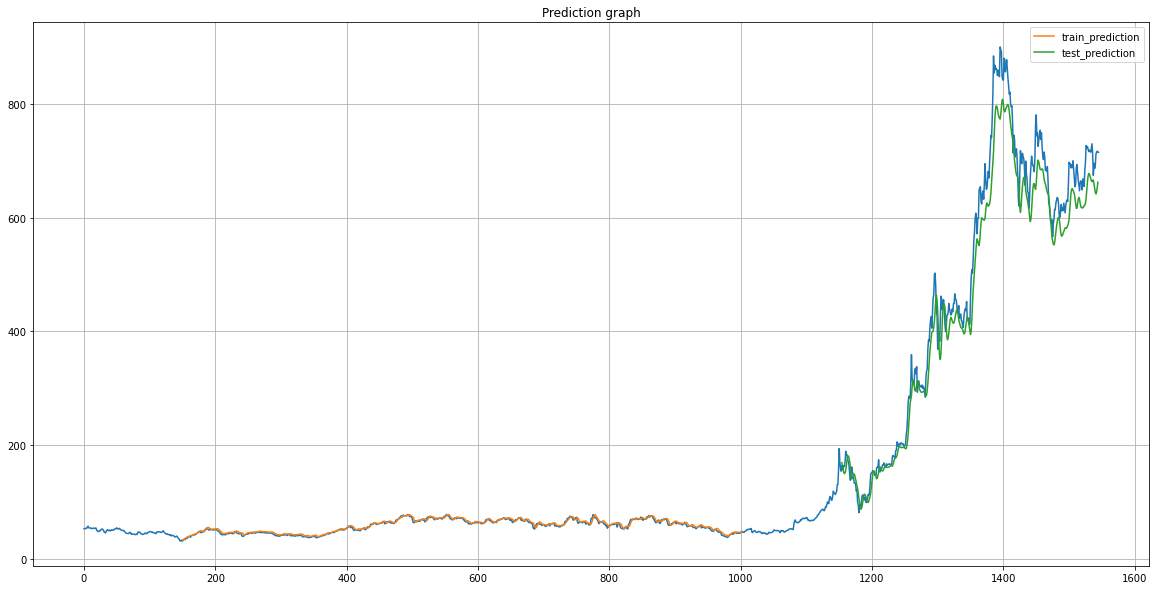

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions

figure(figsize=(20, 10))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot,label="train_prediction")
plt.plot(testPredictPlot,label="test_prediction")
plt.legend()
plt.grid()
plt.title('Prediction graph')
plt.show()

## Predict on next 50 days stock price

In [ ]:
len(test_data)

542

#### taking last 150 sample for 1st time step of LSTM

In [ ]:
x_input=test_data[len(test_data)-150:].reshape(1,-1)
x_input.shape


(1, 150)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.9948240524328091,
 0.9897630983176129,
 0.9397289385014328,
 0.9332992303567256,
 0.9328276750785114,
 0.9771107820422571,
 0.9743272920152584,
 0.9495057283505715,
 0.9590179927727096,
 0.9739707301890392,
 0.9533014094306513,
 0.9360712769387585,
 0.9188871287152629,
 0.9044519998581791,
 0.9086732530982864,
 0.8843348284824689,
 0.8784112152891972,
 0.880826629882166,
 0.848287198147724,
 0.7851521226805395,
 0.8212572497412818,
 0.8122971347018214,
 0.7772041986941604,
 0.7913517749086223,
 0.7937787019591912,
 0.7703029352712389,
 0.7332086443730363,
 0.6864986103587217,
 0.6776304615556351,
 0.7442966915256886,
 0.7900290051475087,
 0.7723733004955885,
 0.7636087016995311,
 0.7846575413369146,
 0.7786074222340478,
 0.7737880364930759,
 0.7571099832210157,
 0.720303244965435,
 0.7690606883015333,
 0.7439630856020351,
 0.7327140630294116,
 0.706811297977835,
 0.704878952270891,
 0.6734321642180937,
 0.6977936160495324,
 0.7372918780957379,
 0.7607791583915008,
 0.778883461268859

In [ ]:
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<50):
    
    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input \n\n{}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.73742485]
151
1 day input 

[0.9897631  0.93972894 0.93329923 0.93282768 0.97711078 0.97432729
 0.94950573 0.95901799 0.97397073 0.95330141 0.93607128 0.91888713
 0.904452   0.90867325 0.88433483 0.87841122 0.88082663 0.8482872
 0.78515212 0.82125725 0.81229713 0.7772042  0.79135177 0.7937787
 0.77030294 0.73320864 0.68649861 0.67763046 0.74429669 0.79002901
 0.7723733  0.7636087  0.78465754 0.77860742 0.77378804 0.75710998
 0.72030324 0.76906069 0.74396309 0.73271406 0.7068113  0.70487895
 0.67343216 0.69779362 0.73729188 0.76077916 0.77888346 0.76552953
 0.75958296 0.75747806 0.74760923 0.77501877 0.84196104 0.86242326
 0.81975048 0.82632965 0.79871315 0.81234312 0.82107325 0.83134462
 0.81246962 0.82620314 0.79710283 0.77927456 0.77208575 0.7872915
 0.77639904 0.7504618  0.75258966 0.7476668  0.75799567 0.7292979
 0.6856474  0.67795248 0.6619071  0.64627571 0.64266403 0.65016343
 0.61561113 0.64165184 0.65065801 0.67113174 0.67056815 0.68457771
 0.69028278 0.69541274 0.69335382 0

6 day output [[0.63075733]]
7 day input 

[0.94950573 0.95901799 0.97397073 0.95330141 0.93607128 0.91888713
 0.904452   0.90867325 0.88433483 0.87841122 0.88082663 0.8482872
 0.78515212 0.82125725 0.81229713 0.7772042  0.79135177 0.7937787
 0.77030294 0.73320864 0.68649861 0.67763046 0.74429669 0.79002901
 0.7723733  0.7636087  0.78465754 0.77860742 0.77378804 0.75710998
 0.72030324 0.76906069 0.74396309 0.73271406 0.7068113  0.70487895
 0.67343216 0.69779362 0.73729188 0.76077916 0.77888346 0.76552953
 0.75958296 0.75747806 0.74760923 0.77501877 0.84196104 0.86242326
 0.81975048 0.82632965 0.79871315 0.81234312 0.82107325 0.83134462
 0.81246962 0.82620314 0.79710283 0.77927456 0.77208575 0.7872915
 0.77639904 0.7504618  0.75258966 0.7476668  0.75799567 0.7292979
 0.6856474  0.67795248 0.6619071  0.64627571 0.64266403 0.65016343
 0.61561113 0.64165184 0.65065801 0.67113174 0.67056815 0.68457771
 0.69028278 0.69541274 0.69335382 0.68134562 0.65971016 0.65517833
 0.66597882 0.68103511 0

12 day output [[0.5470981]]
13 day input 

[0.904452   0.90867325 0.88433483 0.87841122 0.88082663 0.8482872
 0.78515212 0.82125725 0.81229713 0.7772042  0.79135177 0.7937787
 0.77030294 0.73320864 0.68649861 0.67763046 0.74429669 0.79002901
 0.7723733  0.7636087  0.78465754 0.77860742 0.77378804 0.75710998
 0.72030324 0.76906069 0.74396309 0.73271406 0.7068113  0.70487895
 0.67343216 0.69779362 0.73729188 0.76077916 0.77888346 0.76552953
 0.75958296 0.75747806 0.74760923 0.77501877 0.84196104 0.86242326
 0.81975048 0.82632965 0.79871315 0.81234312 0.82107325 0.83134462
 0.81246962 0.82620314 0.79710283 0.77927456 0.77208575 0.7872915
 0.77639904 0.7504618  0.75258966 0.7476668  0.75799567 0.7292979
 0.6856474  0.67795248 0.6619071  0.64627571 0.64266403 0.65016343
 0.61561113 0.64165184 0.65065801 0.67113174 0.67056815 0.68457771
 0.69028278 0.69541274 0.69335382 0.68134562 0.65971016 0.65517833
 0.66597882 0.68103511 0.66803767 0.67355874 0.66892336 0.68379557
 0.67378873 0.66425351 

18 day output [[0.4961025]]
19 day input 

[0.78515212 0.82125725 0.81229713 0.7772042  0.79135177 0.7937787
 0.77030294 0.73320864 0.68649861 0.67763046 0.74429669 0.79002901
 0.7723733  0.7636087  0.78465754 0.77860742 0.77378804 0.75710998
 0.72030324 0.76906069 0.74396309 0.73271406 0.7068113  0.70487895
 0.67343216 0.69779362 0.73729188 0.76077916 0.77888346 0.76552953
 0.75958296 0.75747806 0.74760923 0.77501877 0.84196104 0.86242326
 0.81975048 0.82632965 0.79871315 0.81234312 0.82107325 0.83134462
 0.81246962 0.82620314 0.79710283 0.77927456 0.77208575 0.7872915
 0.77639904 0.7504618  0.75258966 0.7476668  0.75799567 0.7292979
 0.6856474  0.67795248 0.6619071  0.64627571 0.64266403 0.65016343
 0.61561113 0.64165184 0.65065801 0.67113174 0.67056815 0.68457771
 0.69028278 0.69541274 0.69335382 0.68134562 0.65971016 0.65517833
 0.66597882 0.68103511 0.66803767 0.67355874 0.66892336 0.68379557
 0.67378873 0.66425351 0.6791717  0.68708516 0.69058184 0.68733824
 0.72026878 0.76676027

24 day output [[0.44501728]]
25 day input 

[0.77030294 0.73320864 0.68649861 0.67763046 0.74429669 0.79002901
 0.7723733  0.7636087  0.78465754 0.77860742 0.77378804 0.75710998
 0.72030324 0.76906069 0.74396309 0.73271406 0.7068113  0.70487895
 0.67343216 0.69779362 0.73729188 0.76077916 0.77888346 0.76552953
 0.75958296 0.75747806 0.74760923 0.77501877 0.84196104 0.86242326
 0.81975048 0.82632965 0.79871315 0.81234312 0.82107325 0.83134462
 0.81246962 0.82620314 0.79710283 0.77927456 0.77208575 0.7872915
 0.77639904 0.7504618  0.75258966 0.7476668  0.75799567 0.7292979
 0.6856474  0.67795248 0.6619071  0.64627571 0.64266403 0.65016343
 0.61561113 0.64165184 0.65065801 0.67113174 0.67056815 0.68457771
 0.69028278 0.69541274 0.69335382 0.68134562 0.65971016 0.65517833
 0.66597882 0.68103511 0.66803767 0.67355874 0.66892336 0.68379557
 0.67378873 0.66425351 0.6791717  0.68708516 0.69058184 0.68733824
 0.72026878 0.76676027 0.76237797 0.76340167 0.75513166 0.76122776
 0.75568373 0.769497

30 day output [[0.39636487]]
31 day input 

[0.7723733  0.7636087  0.78465754 0.77860742 0.77378804 0.75710998
 0.72030324 0.76906069 0.74396309 0.73271406 0.7068113  0.70487895
 0.67343216 0.69779362 0.73729188 0.76077916 0.77888346 0.76552953
 0.75958296 0.75747806 0.74760923 0.77501877 0.84196104 0.86242326
 0.81975048 0.82632965 0.79871315 0.81234312 0.82107325 0.83134462
 0.81246962 0.82620314 0.79710283 0.77927456 0.77208575 0.7872915
 0.77639904 0.7504618  0.75258966 0.7476668  0.75799567 0.7292979
 0.6856474  0.67795248 0.6619071  0.64627571 0.64266403 0.65016343
 0.61561113 0.64165184 0.65065801 0.67113174 0.67056815 0.68457771
 0.69028278 0.69541274 0.69335382 0.68134562 0.65971016 0.65517833
 0.66597882 0.68103511 0.66803767 0.67355874 0.66892336 0.68379557
 0.67378873 0.66425351 0.6791717  0.68708516 0.69058184 0.68733824
 0.72026878 0.76676027 0.76237797 0.76340167 0.75513166 0.76122776
 0.75568373 0.76949777 0.7510944  0.73004557 0.71708267 0.72223559
 0.75482108 0.761768

36 day output [[0.35678858]]
37 day input 

[0.72030324 0.76906069 0.74396309 0.73271406 0.7068113  0.70487895
 0.67343216 0.69779362 0.73729188 0.76077916 0.77888346 0.76552953
 0.75958296 0.75747806 0.74760923 0.77501877 0.84196104 0.86242326
 0.81975048 0.82632965 0.79871315 0.81234312 0.82107325 0.83134462
 0.81246962 0.82620314 0.79710283 0.77927456 0.77208575 0.7872915
 0.77639904 0.7504618  0.75258966 0.7476668  0.75799567 0.7292979
 0.6856474  0.67795248 0.6619071  0.64627571 0.64266403 0.65016343
 0.61561113 0.64165184 0.65065801 0.67113174 0.67056815 0.68457771
 0.69028278 0.69541274 0.69335382 0.68134562 0.65971016 0.65517833
 0.66597882 0.68103511 0.66803767 0.67355874 0.66892336 0.68379557
 0.67378873 0.66425351 0.6791717  0.68708516 0.69058184 0.68733824
 0.72026878 0.76676027 0.76237797 0.76340167 0.75513166 0.76122776
 0.75568373 0.76949777 0.7510944  0.73004557 0.71708267 0.72223559
 0.75482108 0.76176839 0.74489475 0.73055166 0.71969367 0.70876667
 0.72623837 0.729079

42 day output [[0.32351354]]
43 day input 

[0.67343216 0.69779362 0.73729188 0.76077916 0.77888346 0.76552953
 0.75958296 0.75747806 0.74760923 0.77501877 0.84196104 0.86242326
 0.81975048 0.82632965 0.79871315 0.81234312 0.82107325 0.83134462
 0.81246962 0.82620314 0.79710283 0.77927456 0.77208575 0.7872915
 0.77639904 0.7504618  0.75258966 0.7476668  0.75799567 0.7292979
 0.6856474  0.67795248 0.6619071  0.64627571 0.64266403 0.65016343
 0.61561113 0.64165184 0.65065801 0.67113174 0.67056815 0.68457771
 0.69028278 0.69541274 0.69335382 0.68134562 0.65971016 0.65517833
 0.66597882 0.68103511 0.66803767 0.67355874 0.66892336 0.68379557
 0.67378873 0.66425351 0.6791717  0.68708516 0.69058184 0.68733824
 0.72026878 0.76676027 0.76237797 0.76340167 0.75513166 0.76122776
 0.75568373 0.76949777 0.7510944  0.73004557 0.71708267 0.72223559
 0.75482108 0.76176839 0.74489475 0.73055166 0.71969367 0.70876667
 0.72623837 0.72907936 0.72598529 0.71060698 0.73292109 0.73096572
 0.71770376 0.750737

48 day output [[0.293865]]
49 day input 

[0.75958296 0.75747806 0.74760923 0.77501877 0.84196104 0.86242326
 0.81975048 0.82632965 0.79871315 0.81234312 0.82107325 0.83134462
 0.81246962 0.82620314 0.79710283 0.77927456 0.77208575 0.7872915
 0.77639904 0.7504618  0.75258966 0.7476668  0.75799567 0.7292979
 0.6856474  0.67795248 0.6619071  0.64627571 0.64266403 0.65016343
 0.61561113 0.64165184 0.65065801 0.67113174 0.67056815 0.68457771
 0.69028278 0.69541274 0.69335382 0.68134562 0.65971016 0.65517833
 0.66597882 0.68103511 0.66803767 0.67355874 0.66892336 0.68379557
 0.67378873 0.66425351 0.6791717  0.68708516 0.69058184 0.68733824
 0.72026878 0.76676027 0.76237797 0.76340167 0.75513166 0.76122776
 0.75568373 0.76949777 0.7510944  0.73004557 0.71708267 0.72223559
 0.75482108 0.76176839 0.74489475 0.73055166 0.71969367 0.70876667
 0.72623837 0.72907936 0.72598529 0.71060698 0.73292109 0.73096572
 0.71770376 0.75073784 0.76665679 0.80048445 0.79555007 0.79813804
 0.7935947  0.78828073

In [ ]:
day_new=np.arange(1,151)
day_pred=np.arange(151,201)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1546

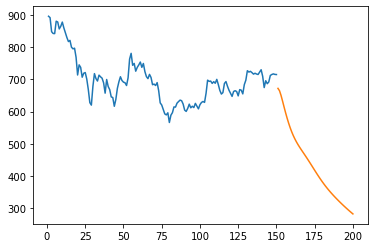

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-150:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

Text(0.5, 1.0, 'After prediction')

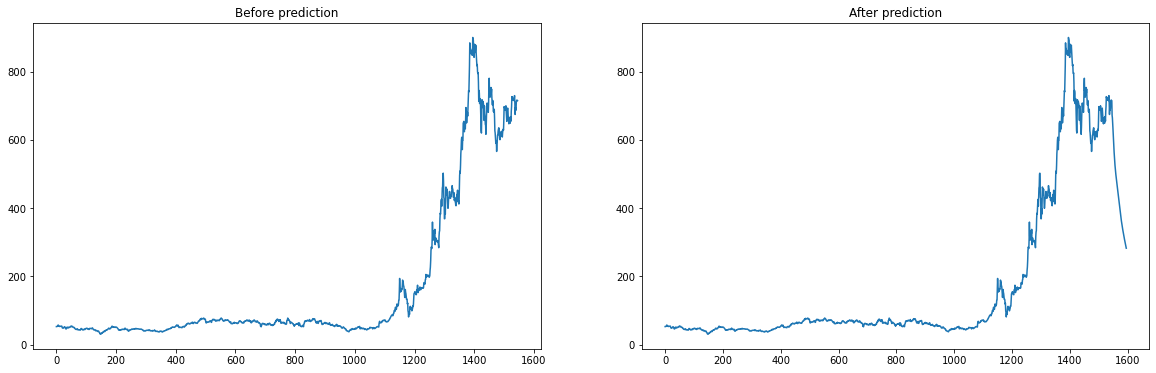

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()
from matplotlib.pyplot import figure

figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(df)
plt.title("Before prediction")
plt.subplot(1, 2, 2)
plt.plot(df3)
plt.title("After prediction")

